In [88]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import seaborn as sns
import numpy as np
from functools import reduce
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from IPython.display import Image  
import pydotplus
from sklearn import preprocessing

In [3]:
df = pd.read_excel("MPVDatasetDownload.xlsx")

In [4]:
df = df.drop(df.columns[[29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49]], axis=1)

In [5]:
df.columns

Index(['Victim's name', 'Victim's age', 'Victim's gender', 'Victim's race',
       'URL of image of victim', 'Date of Incident (month/day/year)',
       'Street Address of Incident', 'City', 'State', 'Zipcode', 'County',
       'Agency responsible for death', 'ORI Agency Identifier (if available)',
       'Cause of death',
       'A brief description of the circumstances surrounding the death',
       'Official disposition of death (justified or other)',
       'Criminal Charges?',
       'Link to news article or photo of official document',
       'Symptoms of mental illness?', 'Armed/Unarmed Status',
       'Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)',
       'Alleged Threat Level (Source: WaPo)', 'Fleeing (Source: WaPo)',
       'Body Camera (Source: WaPo)', 'WaPo ID (If included in WaPo database)',
       'Off-Duty Killing?',
       'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/201

In [6]:
df.rename(columns={'Victim\'s name': 'Name', 'Victim\'s age': 'Age', "Victim\'s gender": "Gender",
                   "Victim\'s race": "Race",  'Date of Incident (month/day/year)': "Date", 
                   "Agency responsible for death" : "Agency", "Cause of death" : "CoD", 
                   "Official disposition of death (justified or other)" : "deathDisposition",
                   "Criminal Charges?" : "criminalCharge", "Symptoms of mental illness?": "sympMentalIll",
                  "Armed/Unarmed Status" : "armedStatus",
                  "Alleged Weapon (Source: WaPo and Review of Cases Not Included in WaPo Database)" : "allegedWeapon",
                  "Alleged Threat Level (Source: WaPo)": "allegedThreat", "Fleeing (Source: WaPo)": "Fleeing",
                  "Body Camera (Source: WaPo)": "bodyCam", "Off-Duty Killing?": "offDuty"}, inplace=True)


df = df.drop(columns=['URL of image of victim', 'Street Address of Incident', 'ORI Agency Identifier (if available)'
                 ,'A brief description of the circumstances surrounding the death', 'Link to news article or photo of official document'
                 ,'WaPo ID (If included in WaPo database)', 'Geography (via Trulia methodology based on zipcode population density: http://jedkolko.com/wp-content/uploads/2015/05/full-ZCTA-urban-suburban-rural-classification.xlsx )',
                  'MPV ID', 'Fatal Encounters ID'])


In [7]:
for i in range(len(df["sympMentalIll"])):
    if df['sympMentalIll'][i] == "Drug or alcohol use":
        df['sympMentalIll'][i] = "UI"
    if df['sympMentalIll'][i] == "Unkown":
        df['sympMentalIll'][i] = "Unknown"
    if df['sympMentalIll'][i] == "Unknown ":
        df['sympMentalIll'][i] = "Unknown"
    if df['sympMentalIll'][i] == "unknown":
        df['sympMentalIll'][i] = "Unknown"

<ipython-input-7-fb282a674539>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sympMentalIll'][i] = "UI"
<ipython-input-7-fb282a674539>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sympMentalIll'][i] = "Unknown"
<ipython-input-7-fb282a674539>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sympMentalIll'][i] = "Unknown"
<ipython-input-7-fb282a674539>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of

In [8]:
df['sympMentalIll']= df['sympMentalIll'].astype(str)

In [9]:
df["Gender"] = df["Gender"].replace("Male ", "Male")
df["Gender"] = df["Gender"].replace("Transgender", "Trans")
df['Gender'] = df['Gender'].replace(np.nan, "Unknown")
df.Gender.unique()


array(['Female', 'Male', 'Unknown', 'Trans'], dtype=object)

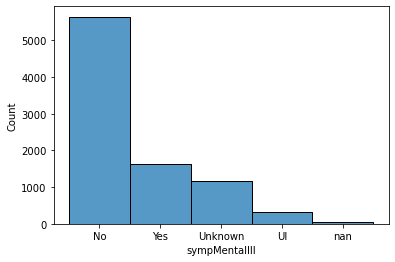

In [10]:
sns.histplot(data=df, x="sympMentalIll")

In [11]:
race_List = ['White', 'Black', 'Other', 'Hispanic']
gender_List = ['Male', 'Female']
age_List = [16, 17, 18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41, 42,43,44, 45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65]

In [12]:
race_df = pd.DataFrame(np.arange(24000).reshape(24000,1)).applymap(lambda x: np.random.choice(race_List, p=[0.48, 0.21, 0.10, 0.21]))
gender_df = pd.DataFrame(np.arange(24000).reshape(24000,1)).applymap(lambda x: np.random.choice(gender_List, p=[0.49, 0.51]))
age_df = pd.DataFrame(np.arange(24000).reshape(24000,1)).applymap(lambda x: np.random.choice(age_List, p=[0.035, .035, 0.0285, 0.0285, .0285,
                                                                                                         0.0285, 0.0285, 0.0285, 0.0285, .015, 
                                                                                                         .015, .015, .015, .015, .015, .015, 
                                                                                                         .015, .015, .015, .015, .015, .015, 
                                                                                                         .015, .015, .015, .015, .015, .015, 
                                                                                                         .015, .013, .013, .013, .013, .013, 
                                                                                                         .013, .013, .013, .013, .013, .013, 
                                                                                                         .013, .013, .013, .013, .013, .013, 
                                                                                                         .013, .013, .013, .1705]))

In [13]:
race_df.index.name = "index"
race_df.columns = ['Race']
gender_df.index.name = 'index'
gender_df.columns = ['Gender']
age_df.index.name = "index"
age_df.columns = ['Age']

In [14]:
df['Race'] = df['Race'].replace(["Unknown race", "Pacific Islander", "Native American", "Asian"], "Other")

df['CoD'] = df['CoD'].replace(['Gunshot', 'Gunshot, Taser', 'Vehicle', 'Tasered',
       'Physical Restraint', 'Taser', 'Chemical agent/Pepper spray',
       'Beaten', 'Beaten/Bludgeoned with instrument', 'Other',
       'Gunshot, Beanbag Gun', 'Gunshot, Police Dog',
       'Gunshot, Bean Bag Gun', 'Gunshot, Pepper Spray', 'Bean bag',
       'Gunshot, Taser, Baton', 'Gunshot, Taser, Beanbag Shotgun',
       'Pepper Spray', 'Asphyxiated',
       'Gunshot, Unspecified Less Lethal Weapon', 'Physical restraint',
       'Taser, Baton', 'Bomb', 'Taser, Physical Restraint',
       'Baton, Pepper Spray, Physical Restraint', 'Gunshot, Vehicle',
       'Gunshot, Stabbed', 'Gunshot, Taser, Pepper spray',
       'Taser, Pepper Spray, Beaten', 'Taser, Beaten',
       'Taser, Pepper spray, beaten'], 0)

In [15]:
new_df = [race_df, gender_df, age_df]

In [16]:
df_final = reduce(lambda left,right: pd.merge(left,right,on="index"), new_df)

In [17]:
test = df.append(df_final)

In [18]:
test

,Name,Age,Gender,Race,Date,City,State,Zipcode,County,Agency,CoD,deathDisposition,criminalCharge,sympMentalIll,armedStatus,allegedWeapon,allegedThreat,Fleeing,bodyCam,offDuty
0,Name withheld by police,NaN,Female,Other,2021-01-26,Aurora,CO,80137.0,Adams,Adams County Sheriff's Office,0.0,Pending investigation,No known charges,No,Allegedly Armed,gun,other,not fleeing,NaN,NaN
1,John Eric Ostbye,50,Male,White,2021-01-25,Graham,WA,98338.0,Pierce,Pierce County Sheriff's Office,0.0,Pending investigation,No known charges,No,Allegedly Armed,knife,other,not fleeing,NaN,NaN
2,Tyree Kajawn Rogers,38,Male,Black,2021-01-24,Wichita Falls,TX,76305.0,Wichita Falls,Wichita County Sheriff's Office,0.0,Pending investigation,No known charges,No,Vehicle,vehicle,attack,car,no,NaN
3,Caleb McCree,43,Male,White,2021-01-24,Slidell,LA,70460.0,St. Tammany,"Slidell Police Department, St. Tammany Parish ...",0.0,Pending investigation,No known charges,Yes,Allegedly Armed,box cutter,attack,NaN,no,NaN
4,Steven Verdone,NaN,Male,White,2021-01-22,Homosassa,FL,34446.0,Citrus,Citrus County Sheriff's Office,0.0,Pending investigation,No known charges,Unknown,Allegedly Armed,knife,other,not fleeing,no,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,NaN,47,Male,White,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,49,Female,White,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23997,NaN,44,Male,White,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23998,NaN,65,Male,Black,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
test['CoD'] = test['CoD'].replace(np.nan, 1)

In [20]:
test['num_race'] = test["Race"]
test['num_race'] = test['num_race'].replace('White', 0)
test['num_race'] = test['num_race'].replace('Black', 1)
test['num_race'] = test['num_race'].replace('Hispanic', 2)
test['num_race'] = test['num_race'].replace('Other', 3)

In [21]:
test['num_gender'] = test['Gender']
test['num_gender'] = test['num_gender'].replace('Male', 0)
test['num_gender'] = test['num_gender'].replace('Female', 1)
test['num_gender'] = test['num_gender'].replace('Trans', 2)
test['num_gender'] = test['num_gender'].replace('Unknown', 3)

In [64]:
test['num_sympMentalIll'] = test['sympMentalIll']
test['num_sympMentalIll'] = test['num_sympMentalIll'].replace('Yes', 1)
test['num_sympMentalIll'] = test['num_sympMentalIll'].replace('No', 0)
test['num_sympMentalIll'] = test['num_sympMentalIll'].replace('Unknown', 2)
test['num_sympMentalIll'] = test['num_sympMentalIll'].replace('UI', 3)

<ipython-input-64-fab20f52d421>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['num_sympMentalIll'] = test['sympMentalIll']
<ipython-input-64-fab20f52d421>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['num_sympMentalIll'] = test['num_sympMentalIll'].replace('Yes', 1)
<ipython-input-64-fab20f52d421>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

In [22]:
test['Age'] = test['Age'].replace('40s', None)
test['Age'] = test['Age'].replace('Unknown', None)
test = test.dropna(subset=['Age'])
test.Age.unique()


array([50, 38, 43, 33, 27, 34, 21, 19, 55, 32, 46, 56, 25, 24, 48, 65, 26,
       36, 30, 23, 54, 31, 45, 28, 37, 49, 52, 91, 18, 47, 40, 35, 20, 59,
       39, 63, 29, 41, 85, 42, 60, 79, 22, 44, 70, 62, 74, 15, 75, 17, 66,
       16, 61, 58, 64, 53, 57, 51, 88, 67, 73, 68, 81, 69, 82, 83, 87, 76,
       77, 80, 14, 71, 6, 78, 72, 84, 89, 1, 13, 86, 10, 12, 95, 5, 93, 7,
       107], dtype=object)

In [113]:
test

,Name,Age,Gender,Race,Date,City,State,Zipcode,County,Agency,...,allegedWeapon,allegedThreat,Fleeing,bodyCam,offDuty,num_race,num_gender,predictions,num_sympMentalIll,norm_Age
1,John Eric Ostbye,50,Male,White,2021-01-25,Graham,WA,98338.0,Pierce,Pierce County Sheriff's Office,...,knife,other,not fleeing,NaN,NaN,0,0,1.0,0,0.462264
2,Tyree Kajawn Rogers,38,Male,Black,2021-01-24,Wichita Falls,TX,76305.0,Wichita Falls,Wichita County Sheriff's Office,...,vehicle,attack,car,no,NaN,1,0,1.0,0,0.349057
3,Caleb McCree,43,Male,White,2021-01-24,Slidell,LA,70460.0,St. Tammany,"Slidell Police Department, St. Tammany Parish ...",...,box cutter,attack,NaN,no,NaN,0,0,0.0,1,0.396226
5,Ryan Daniel Stallings,33,Male,White,2021-01-21,College Station,TX,77840.0,Brazos,College Station Police Department,...,gun,other,not fleeing,no,NaN,0,0,1.0,0,0.301887
7,David Tovar Jr.,27,Male,Hispanic,2021-01-21,San Jose,CA,95127.0,Santa Clara,San Jose Police Department,...,undetermined,other,NaN,no,NaN,2,0,1.0,0,0.245283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23995,NaN,47,Male,White,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1.0,NaN,0.433962
23996,NaN,49,Female,White,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,1,1.0,NaN,0.452830
23997,NaN,44,Male,White,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0,0,1.0,NaN,0.405660
23998,NaN,65,Male,Black,NaT,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1,0,1.0,NaN,0.603774


In [115]:
np.mean(test.norm_Age)

0.36672117132114695

In [94]:
age_column = test['Age'].values
min_max_scaler = preprocessing.MinMaxScaler()
age_column = age_column.reshape(-1, 1)
x_scaled = min_max_scaler.fit_transform(age_column)
test['norm_Age'] = x_scaled

<ipython-input-94-95882b9e6839>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['norm_Age'] = x_scaled


In [96]:
test.to_csv(r'/Users/noahstein/Documents/DA401/df.csv', index = False)

In [75]:
selected = test[['num_race','num_gender', 'Age']].values
y = test["CoD"].values

In [122]:
feature_cols = ['num_race','num_gender', 'Age']
X = test[feature_cols].values
y = test["CoD"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [123]:
clf = LogisticRegression(random_state=350)
clf_fit = clf.fit(X_train, y_train)
clf_fit.predict_proba(X_train)
y_pred3 = clf_fit.predict(X_test)

In [116]:
y_pred3

array([1., 1., 1., ..., 1., 0., 1.])

In [124]:
print("R squared:" ,metrics.r2_score(y_test, y_pred3))

R squared: -0.4459576804019054


In [100]:
(np.where(y_pred3 == 1))

(array([    0,     1,     2, ..., 24608, 24609, 24611]),)

In [101]:
test["predictions"] = pd.DataFrame(y_pred3)

<ipython-input-101-4eea510c2bbd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["predictions"] = pd.DataFrame(y_pred3)


In [30]:
b_count, w_count, h_count, o_count = 0,0,0,0
for i in range(len(test)):
    if (test['Race'].iloc[i] == 'Black') & (test.predictions.iloc[i] == 1):
        b_count += 1
    if (test.Race.iloc[i] == 'White')& (test.predictions.iloc[i] == 1):
        w_count += 1
    if (test.Race.iloc[i] == 'Hispanic')& (test.predictions.iloc[i] == 1):
        h_count += 1
    if (test.Race.iloc[i] == 'Other')& (test.predictions.iloc[i] == 1):
        o_count += 1

In [31]:
test['Race'].value_counts()

White       15402
Black        7197
Hispanic     6612
Other        3606
Name: Race, dtype: int64

In [57]:
clf_fit.predict_proba(selected)[:,0]

array([0.356199  , 0.41775377, 0.38223488, ..., 0.37846978, 0.31792278,
       0.02606808])

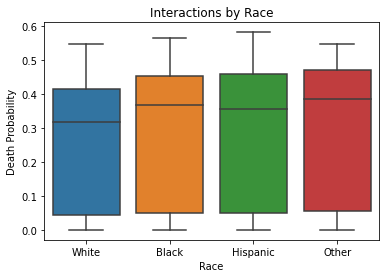

In [126]:
ax = sns.boxplot(x = "Race", y = clf_fit.predict_proba(selected)[:,0], data = test)
ax.set(xlabel='Race', ylabel='Death Probability', title = "Interactions by Race")
plt.show()

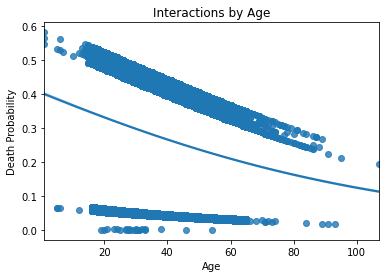

In [125]:
ax = sns.regplot(x=(test['Age'].astype(float)), y=clf_fit.predict_proba(selected)[:,0], data=test, logistic=True)
ax.set(xlabel='Age', ylabel='Death Probability', title = "Interactions by Age")
plt.show()

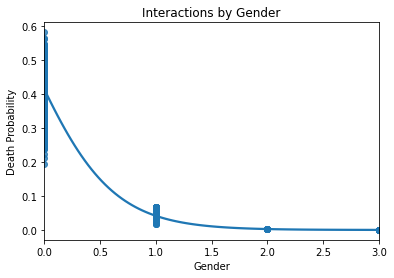

In [60]:
ax = sns.regplot(x=(test['num_gender'].astype(float)), y=clf_fit.predict_proba(selected)[:,0], data=test, logistic=True)
ax.set(xlabel='Gender', ylabel='Death Probability', title = "Interactions by Gender")
plt.show()

In [41]:
test.to_csv(r'/Users/noahstein/Documents/DA401/df.csv', index = False)